In [1]:
import pandas as pd
data = pd.read_csv("BankNote_Authentication.csv")

In [2]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [3]:
data.shape

(1372, 5)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [49]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [50]:
def uniq(data):
    for col in data.columns:
        print(col,":", data[col].min(),",",data[col].max())

In [51]:
uniq(data)

variance : -7.0421 , 6.8248
skewness : -13.7731 , 12.9516
curtosis : -5.2861 , 17.9274
entropy : -8.5482 , 2.4495
class : 0 , 1


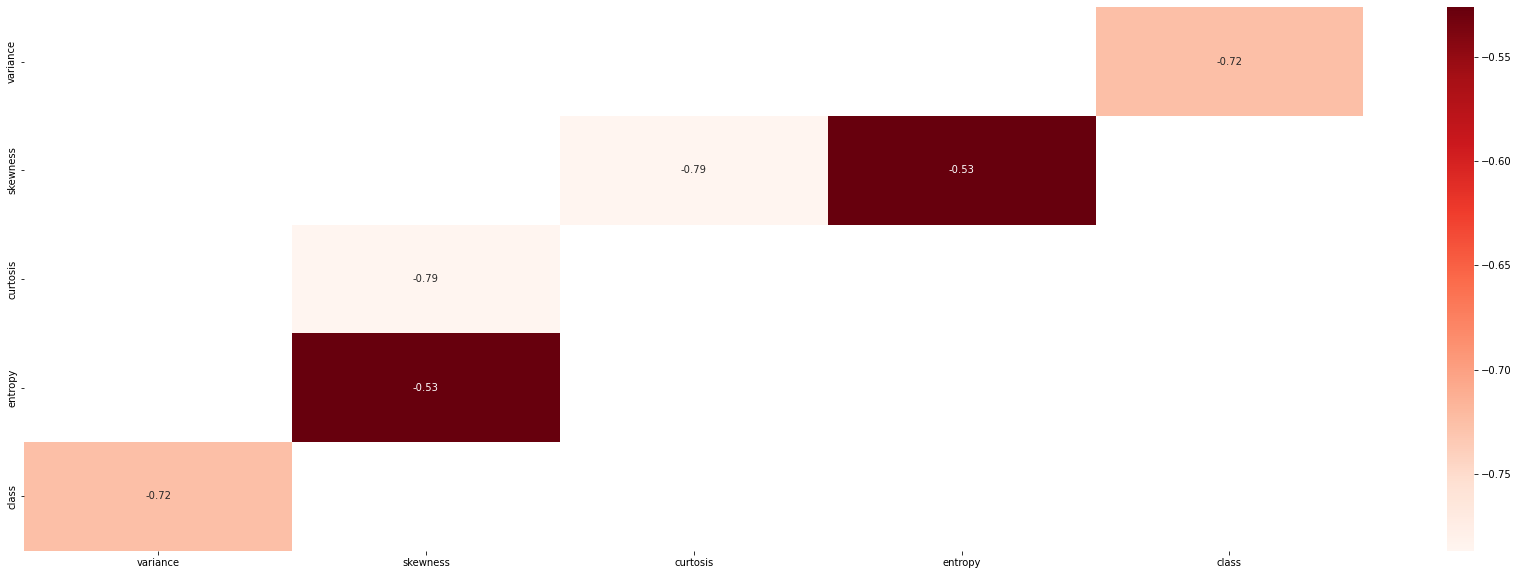

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
dataCorr = data.corr()
filteredData = dataCorr[((dataCorr >= .7) | (dataCorr <= -.5)) & (dataCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredData, annot=True, cmap="Reds")
plt.show()

In [18]:
#Correlation with output variable
cor_target = dataCorr["class"]

variance   -0.724843
skewness   -0.444688
curtosis    0.155883
entropy    -0.023424
class       1.000000
Name: class, dtype: float64

In [20]:
X=data.drop(['class'], axis=1)  
y=data['class']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [23]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression().fit(X_train, y_train)

In [24]:
y_pred_lreg = lreg.predict(X_test)

In [25]:
## Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[152   5]
 [  0 118]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       157
           1       0.96      1.00      0.98       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

----------------------------------------------------------------------------------------------------
Accuracy =  98.18181818 %


In [27]:
from sklearn.svm import SVC
## Instantiate the model
svc = SVC()
# Fit the model on training data
svc.fit(X_train, y_train)

SVC()

In [29]:
## Getting the predictions for x_test
y_pred_svc = svc.predict(X_test)

In [30]:
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*50)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*50)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,8)
print('Accuracy = ', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[157   0]
 [  0 118]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


In [31]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best K Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best K Value: 1
Test Accuracy: 100.0%


In [34]:
knn = KNeighborsClassifier(n_neighbors=best_Kvalue)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [42]:
print('K Nearest Neighbour')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))
print('--'*50)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

# Accuracy
print('--'*50)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100,8)
print('Accuracy = ', knn_accuracy,'%')

K Nearest Neighbour


Confusion Matrix
[[156   1]
 [  0 118]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

----------------------------------------------------------------------------------------------------
Accuracy =  99.63636364 %


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier()
# Fit model to training data
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [37]:
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*50)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,8)
print('Accuracy = ', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[157   0]
 [  0 118]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


In [39]:
from xgboost import XGBClassifier

# Create model object
xgb = XGBClassifier(n_jobs=-1)

# Fit model to training data
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

[20:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
print('XGBoost Classifer')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_xgb))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_xgb))

# Accuracy
print('--'*50)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb)*100,8)
print('Accuracy = ', xgb_accuracy,'%')

XGBoost Classifer


Confusion Matrix
[[157   0]
 [  0 118]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


In [43]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Linear SVC', 
               'K-Nearest Neighbors', 'Random Forest','XGBoost Classifier'],
    'Score': [logreg_accuracy, svc_accuracy, 
               knn_accuracy, rf_accuracy,xgb_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.000000
4,XGBoost Classifier,100.000000
1,Linear SVC,99.636364
2,K-Nearest Neighbors,99.636364
0,Logistic Regression,98.181818
